<a href="https://colab.research.google.com/github/manola1109/CNN-and-Hyperparameter-Tuning-in-Keras/blob/main/CNN_and_Hyperparameter_Tuning_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

# Steps to build CNN to solve Emergency vs Non-Emergency vehicle classification problem

1. Loading the Dataset
2. Pre-processing the Data
3. Creating Training and Validation set
4. Defining the Model Architecture
5. Compiling the Model
6. Training the Model
7. Evaluating model performance

## 1. Loading the Dataset

In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer, BatchNormalization, Dropout
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# unzipping the Dataset.zip file
!unzip /content/drive/My\ Drive/Dataset.zip

Archive:  /content/drive/My Drive/Dataset.zip
   creating: Dataset/
  inflating: Dataset/emergency_classification.csv  
   creating: Dataset/images/
  inflating: Dataset/images/0.jpg    
  inflating: Dataset/images/10.jpg   
  inflating: Dataset/images/1002.jpg  
  inflating: Dataset/images/1006.jpg  
  inflating: Dataset/images/1007.jpg  
  inflating: Dataset/images/1009.jpg  
  inflating: Dataset/images/1013.jpg  
  inflating: Dataset/images/1014.jpg  
  inflating: Dataset/images/1016.jpg  
  inflating: Dataset/images/1019.jpg  
  inflating: Dataset/images/102.jpg  
  inflating: Dataset/images/1020.jpg  
  inflating: Dataset/images/1022.jpg  
  inflating: Dataset/images/1023.jpg  
  inflating: Dataset/images/1026.jpg  
  inflating: Dataset/images/1031.jpg  
  inflating: Dataset/images/1035.jpg  
  inflating: Dataset/images/1036.jpg  
  inflating: Dataset/images/1037.jpg  
  inflating: Dataset/images/104.jpg  
  inflating: Dataset/images/1040.jpg  
  inflating: Dataset/images/1041.jpg

In [ ]:
# create random number generator
seed = 42

In [4]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [5]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [6]:
# shape of the images
X.shape

(2352, 224, 224, 3)

## 2. Pre-processing the Data

In [7]:
# since we are using CNN, we do not have to resize the images into 1D array.

In [8]:
# normalizing the pixel values
X = X / X.max()

## 3. Creating Training and Validation set

In [10]:
# create random number generator
seed = 42

In [11]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [12]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 224, 224, 3), (1646,)), ((706, 224, 224, 3), (706,)))

## 4. Defining the Model Architecture

![alt text](https://drive.google.com/uc?id=1qsops2ZfESuzjg7-V0rmOfVE0PtErYrJ)

In [13]:
# importing the convolutional and flatten layer from keras
from keras.layers import Conv2D, Flatten

In [14]:
# defining the model architecture

# creating a sequential model
model = Sequential()

# defining input layer with 3D input of shape (224,224,3)
model.add(InputLayer(input_shape=(224, 224, 3)))

# defining the first convolutional layer with 25 filters of size (5,5)
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
# defining the second convolutional layer with 50 filters of size (5,5)
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))

# flattening the output from convolutional layers so that it can be forwarded to the dense layers
model.add(Flatten())

# defining the first dense or fully connected layer with 100 neurons
model.add(Dense(units=100, activation='sigmoid'))
# defining the output layer with 1 neuron since it is a binary classification problem
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [15]:
# printing summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 220, 220, 25)   │         1,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 216, 216, 50)   │        31,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2332800)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │   233,280,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233,313,401 (890.02 MB)

 Trainable params: 233,313,401 (890.02 MB)

 Non-trainable params: 0 (0.00 B)

## Understanding the Architecture
*  Input shape is (224,224,3) since images are of this shape
*  We then applied 25 filters each of shape (5,5) and stride is (1,1)
*  So the output from first convolutional layer is: **(224-5+1,224-5+1,25)** which is **(220,220,25)**
*  We then applied 50 filters of shape (5,5) each with stride (1,1)
*  Then the output is **(220-5+1,220-5+1,50)** which is **(216,216,50)**
*  Then this output is flattened which resulted in 216 X 216 X 50 = 2332800 features
*  Finally these features are passed through the fully connected layers.


## Understanding the number of parameters of different layers

1.   First Convolutional Layer
    * Number of input channels = 3
    * Number of filters = 25
    * Filter Size = (5,5)
    * Learnable parameters = **25 * 5 * 5 * 3 + 25** (1 bias for each filter) = **1900**
2.   Second Convolutional Layer
    * Number of input channels = 25
    * Number of filters = 50
    * Filter Size = (5,5)
    * Learnable parameters = **50 * 5 * 5 * 25 + 50** (1 bias for each filter) = **31300**
3.   First Fully Connected Layer
    * Number of input features = 216 * 216 * 50 = 2332800
    * Number of neurons in this hidden layer = 100
    * Learnable parameters = **2332800 * 100 + 100** (1 bias for each neuron) = **233280100**
3.   Output Layer
    * Number of input features = 100
    * Number of neurons in this layer = 1
    * Learnable parameters = **100 * 1 + 1** (1 bias for each neuron) = **101**



## 5. Compiling the Model

In [16]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

## 6. Training the Model

In [17]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.5487 - loss: 0.7161 - val_accuracy: 0.5652 - val_loss: 0.6645
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 65s 497ms/step - accuracy: 0.6263 - loss: 0.6418 - val_accuracy: 0.6742 - val_loss: 0.6222
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 531ms/step - accuracy: 0.6668 - loss: 0.6271 - val_accuracy: 0.6827 - val_loss: 0.6107
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 507ms/step - accuracy: 0.6918 - loss: 0.6008 - val_accuracy: 0.6813 - val_loss: 0.6067
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 518ms/step - accuracy: 0.6978 - loss: 0.5819 - val_accuracy: 0.6926 - val_loss: 0.5933
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 516ms/step - accuracy: 0.6963 - loss: 0.5845 - val_accuracy: 0.6827 - val_loss: 0.5806
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 520ms/step - accuracy: 0.7195 - loss: 0.5664 - val_accuracy: 0.6700 - val_loss: 0.6063
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 541ms/step - accuracy: 0.7069 - loss: 0.5583 - val_accuracy: 

## 7. Evaluating model performance

In [19]:
# accuracy on training set
# Use model.predict() and apply a threshold to get the class predictions
train_predictions = (model.predict(X_train) > 0.5).astype("int32")
print('Accuracy on training set:', accuracy_score(y_train, train_predictions), '%')

# accuracy on validation set
# Use model.predict() and apply a threshold to get the class predictions
valid_predictions = (model.predict(X_valid) > 0.5).astype("int32")
print('Accuracy on validation set:', accuracy_score(y_valid, valid_predictions), '%')

52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step
Accuracy on training set: 0.778857837181045 %
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step
Accuracy on validation set: 0.7223796033994334 %


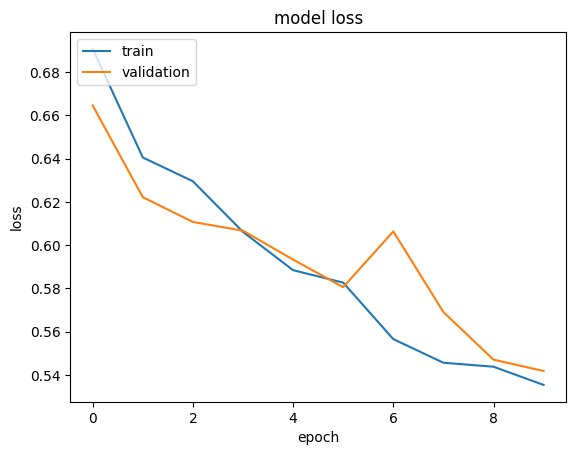

In [20]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

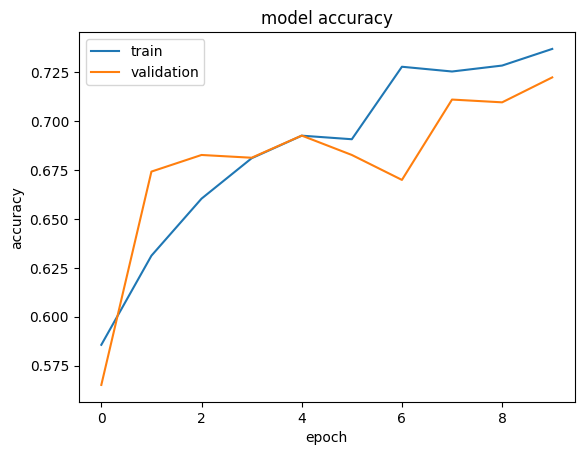

In [22]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy']) # Changed 'acc' to 'accuracy'
plt.plot(model_history.history['val_accuracy']) # Changed 'val_acc' to 'val_accuracy'
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Adding Maxpool layer to reduce parameters

In [23]:
# importing maxpool layer from keras
from keras.layers import MaxPool2D

In [24]:
# defining the model architecture with maxpool layer
model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
# adding maxpool layer after the convolutional layers
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))
model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [25]:
# summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 220, 220, 25)   │         1,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 216, 216, 50)   │        31,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 54, 54, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 145800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │    14,580,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,613,401 (55.75 MB)

 Trainable params: 14,613,401 (55.75 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 761ms/step - accuracy: 0.5848 - loss: 0.7781 - val_accuracy: 0.5977 - val_loss: 0.6704
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 462ms/step - accuracy: 0.5859 - loss: 0.6742 - val_accuracy: 0.6020 - val_loss: 0.6602
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 460ms/step - accuracy: 0.6270 - loss: 0.6541 - val_accuracy: 0.5623 - val_loss: 0.6622
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 411ms/step - accuracy: 0.6069 - loss: 0.6514 - val_accuracy: 0.5963 - val_loss: 0.6441
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 468ms/step - accuracy: 0.6200 - loss: 0.6433 - val_accuracy: 0.6530 - val_loss: 0.6288
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 465ms/step - accuracy: 0.6508 - loss: 0.6261 - val_accuracy: 0.6799 - val_loss: 0.6196
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 460ms/step - accuracy: 0.6504 - loss: 0.6369 - val_accuracy: 0.6898 - val_loss: 0.6084
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 414ms/step - accuracy: 0.6562 - loss: 0.6281 - val_accurac

In [28]:
# accuracy on training set
# Use model.predict() and apply a threshold to get the class predictions
train_predictions = (model.predict(X_train) > 0.5).astype("int32")
print('Accuracy on training set:', accuracy_score(y_train, train_predictions), '%')

# accuracy on validation set
# Use model.predict() and apply a threshold to get the class predictions
valid_predictions = (model.predict(X_valid) > 0.5).astype("int32")
print('Accuracy on validation set:', accuracy_score(y_valid, valid_predictions), '%')

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step
Accuracy on training set: 0.7193195625759417 %
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
Accuracy on validation set: 0.7124645892351275 %


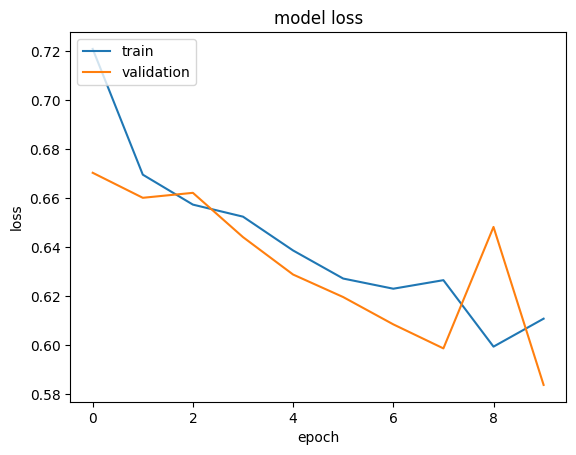

In [29]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

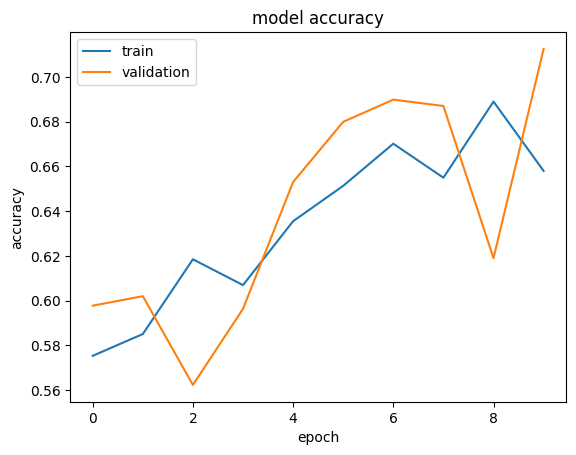

In [31]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy']) # Changed 'acc' to 'accuracy'
plt.plot(model_history.history['val_accuracy']) # Changed 'val_acc' to 'val_accuracy'
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Hyperparameter Tuning of Convolutional Neural Networks

1. increase number of convolutional layers
2. increase number of pooling layers
3. increase number of convolutional filters
4. change size of convolutional filters
5. change pooling type
6. change padding technique
7. change stride

#### Hyperparameters of fully connected layers

1. change activation function of hidden layer
2. increase hidden neurons
3. increase hidden layers
4. increase number of epochs
5. change optimizer
6. add batch normalization layer
7. add dropout layer

## 1. Increasing number of convolutional layers

In [32]:
# increase number of convolutional layers

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [33]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 220, 220, 25)   │         1,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 216, 216, 50)   │        31,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 212, 212, 50)   │        62,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 140450)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    14,045,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,140,951 (53.94 MB)

 Trainable params: 14,140,951 (53.94 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 92s 5s/step - accuracy: 0.4566 - loss: 0.7514 - val_accuracy: 0.5609 - val_loss: 0.7082
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 810ms/step - accuracy: 0.5920 - loss: 0.6750 - val_accuracy: 0.5581 - val_loss: 0.6798
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 799ms/step - accuracy: 0.5945 - loss: 0.6689 - val_accuracy: 0.5595 - val_loss: 0.6713
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 818ms/step - accuracy: 0.5888 - loss: 0.6601 - val_accuracy: 0.6062 - val_loss: 0.6572
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 818ms/step - accuracy: 0.6301 - loss: 0.6513 - val_accuracy: 0.5921 - val_loss: 0.6538
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 812ms/step - accuracy: 0.6274 - loss: 0.6438 - val_accuracy: 0.6516 - val_loss: 0.6311
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 806ms/step - accuracy: 0.6468 - loss: 0.6349 - val_accuracy: 0.6544 - val_loss: 0.6252
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 813ms/step - accuracy: 0.6526 - loss: 0.6242 - val_accurac

In [36]:
# accuracy on training set
# Use model.predict() and apply a threshold to get the class predictions
train_predictions = (model.predict(X_train) > 0.5).astype("int32")
print('Accuracy on training set:', accuracy_score(y_train, train_predictions), '%')

52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step
Accuracy on training set: 0.6852976913730255 %


In [37]:
# accuracy on validation set
# Use model.predict() and apply a threshold to get the class predictions
valid_predictions = (model.predict(X_valid) > 0.5).astype("int32")
print('Accuracy on validation set:', accuracy_score(y_valid, valid_predictions), '%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step
Accuracy on validation set: 0.669971671388102 %


## 2. Increasing number of pooling layers

In [38]:
# increase number of pooling layers

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [39]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 220, 220, 25)   │         1,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 55, 55, 25)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 51, 51, 50)     │        31,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 753,401 (2.87 MB)

 Trainable params: 753,401 (2.87 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 664ms/step - accuracy: 0.4501 - loss: 0.7127 - val_accuracy: 0.5609 - val_loss: 0.6881
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - accuracy: 0.5819 - loss: 0.6813 - val_accuracy: 0.5609 - val_loss: 0.6877
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.6003 - loss: 0.6729 - val_accuracy: 0.5609 - val_loss: 0.6866
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.5939 - loss: 0.6749 - val_accuracy: 0.5609 - val_loss: 0.6863
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.5799 - loss: 0.6779 - val_accuracy: 0.5609 - val_loss: 0.6858
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.5957 - loss: 0.6715 - val_accuracy: 0.5609 - val_loss: 0.6842
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.5716 - loss: 0.6784 - val_accuracy: 0.5609 - val_loss: 0.6843
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.5808 - loss: 0.6748 - val_accuracy: 

In [42]:
# accuracy on training set
# Use model.predict() and apply a threshold to get the class predictions
train_predictions = (model.predict(X_train) > 0.5).astype("int32")
print('Accuracy on training set:', accuracy_score(y_train, train_predictions), '%')

52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
Accuracy on training set: 0.586269744835966 %


In [44]:
# accuracy on validation set
# Use model.predict() and apply a threshold to get the class predictions
valid_predictions = (model.predict(X_valid) > 0.5).astype("int32")
print('Accuracy on validation set:', accuracy_score(y_valid, valid_predictions), '%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Accuracy on validation set: 0.5609065155807366 %


## 3. Increasing number of convolutional filters

In [45]:
# increase number of convolutional filters

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(75, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [46]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 220, 220, 50)   │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 216, 216, 75)   │        93,825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 218700)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │    21,870,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,967,826 (83.80 MB)

 Trainable params: 21,967,826 (83.80 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 131s 7s/step - accuracy: 0.5833 - loss: 0.6778 - val_accuracy: 0.5609 - val_loss: 0.6800
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 729ms/step - accuracy: 0.5842 - loss: 0.6710 - val_accuracy: 0.5609 - val_loss: 0.6726
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 716ms/step - accuracy: 0.5908 - loss: 0.6632 - val_accuracy: 0.5609 - val_loss: 0.6668
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 731ms/step - accuracy: 0.5888 - loss: 0.6569 - val_accuracy: 0.5680 - val_loss: 0.6573
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 721ms/step - accuracy: 0.6062 - loss: 0.6483 - val_accuracy: 0.6161 - val_loss: 0.6463
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 732ms/step - accuracy: 0.6374 - loss: 0.6428 - val_accuracy: 0.6161 - val_loss: 0.6400
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 741ms/step - accuracy: 0.6697 - loss: 0.6199 - val_accuracy: 0.6955 - val_loss: 0.6223
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 740ms/step - accuracy: 0.6765 - loss: 0.6187 - val_accurac

In [49]:
# accuracy on training set
# Use model.predict() and apply a threshold to get the class predictions
train_predictions = (model.predict(X_train) > 0.5).astype("int32")
print('Accuracy on training set:', accuracy_score(y_train, train_predictions), '%')

52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step
Accuracy on training set: 0.6901579586877278 %


In [50]:
# accuracy on validation set
# Use model.predict() and apply a threshold to get the class predictions
valid_predictions = (model.predict(X_valid) > 0.5).astype("int32")
print('Accuracy on validation set:', accuracy_score(y_valid, valid_predictions), '%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step
Accuracy on validation set: 0.7011331444759207 %


## 4. Changing size of convolutional filters

In [51]:
# change filter size for convolutional layer

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (3, 3), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (3, 3), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [52]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 222, 222, 25)   │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 220, 220, 50)   │        11,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 55, 55, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 151250)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │    15,125,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,137,201 (57.74 MB)

 Trainable params: 15,137,201 (57.74 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5770 - loss: 0.6815 - val_accuracy: 0.5609 - val_loss: 0.6839
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 38s 293ms/step - accuracy: 0.5975 - loss: 0.6652 - val_accuracy: 0.5609 - val_loss: 0.6688
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 287ms/step - accuracy: 0.6006 - loss: 0.6568 - val_accuracy: 0.6232 - val_loss: 0.6583
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 301ms/step - accuracy: 0.6113 - loss: 0.6539 - val_accuracy: 0.5793 - val_loss: 0.6529
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 304ms/step - accuracy: 0.6205 - loss: 0.6443 - val_accuracy: 0.5963 - val_loss: 0.6454
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.6411 - loss: 0.6384 - val_accuracy: 0.6544 - val_loss: 0.6314
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 311ms/step - accuracy: 0.6576 - loss: 0.6292 - val_accuracy: 0.6572 - val_loss: 0.6260
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 319ms/step - accuracy: 0.6557 - loss: 0.6313 - val_accuracy: 0.6

In [55]:
# accuracy on training set
# Use model.predict() and apply a threshold to get the class predictions
train_predictions = (model.predict(X_train) > 0.5).astype("int32")
print('Accuracy on training set:', accuracy_score(y_train, train_predictions), '%')

# accuracy on validation set
# Use model.predict() and apply a threshold to get the class predictions
valid_predictions = (model.predict(X_valid) > 0.5).astype("int32")
print('Accuracy on validation set:', accuracy_score(y_valid, valid_predictions), '%')

52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step
Accuracy on training set: 0.701093560145808 %
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
Accuracy on validation set: 0.6926345609065155 %


## 5. Changing pooling size

In [56]:
# change pooling size

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [57]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 220, 220, 25)   │         1,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 216, 216, 50)   │        31,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 108, 108, 50)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 583200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │    58,320,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,353,401 (222.60 MB)

 Trainable params: 58,353,401 (222.60 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 866ms/step - accuracy: 0.5774 - loss: 0.6763 - val_accuracy: 0.5680 - val_loss: 0.6660
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 434ms/step - accuracy: 0.5952 - loss: 0.6605 - val_accuracy: 0.5765 - val_loss: 0.6536
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 427ms/step - accuracy: 0.6187 - loss: 0.6454 - val_accuracy: 0.6856 - val_loss: 0.6377
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 478ms/step - accuracy: 0.6626 - loss: 0.6318 - val_accuracy: 0.6020 - val_loss: 0.6382
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 437ms/step - accuracy: 0.6676 - loss: 0.6111 - val_accuracy: 0.6416 - val_loss: 0.6384
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 435ms/step - accuracy: 0.6453 - loss: 0.6371 - val_accuracy: 0.6941 - val_loss: 0.5909
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 487ms/step - accuracy: 0.7048 - loss: 0.5948 - val_accuracy: 0.6827 - val_loss: 0.5858
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 478ms/step - accuracy: 0.6841 - loss: 0.5860 - val_accuracy

In [60]:
# accuracy on training set
# Use model.predict() and apply a threshold to get the class predictions
train_predictions = (model.predict(X_train) > 0.5).astype("int32")
print('Accuracy on training set:', accuracy_score(y_train, train_predictions), '%')

# accuracy on validation set
# Use model.predict() and apply a threshold to get the class predictions
valid_predictions = (model.predict(X_valid) > 0.5).astype("int32")
print('Accuracy on validation set:', accuracy_score(y_valid, valid_predictions), '%')

52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step
Accuracy on training set: 0.7509113001215066 %
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step
Accuracy on validation set: 0.6940509915014165 %


## 6. Changing padding technique

In [61]:
# change padding technique

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [62]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 224, 224, 25)   │         1,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 224, 224, 50)   │        31,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 156800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │    15,680,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,713,401 (59.94 MB)

 Trainable params: 15,713,401 (59.94 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.5396 - loss: 0.6902 - val_accuracy: 0.5609 - val_loss: 0.6833
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 408ms/step - accuracy: 0.5940 - loss: 0.6726 - val_accuracy: 0.5637 - val_loss: 0.6731
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 456ms/step - accuracy: 0.5898 - loss: 0.6641 - val_accuracy: 0.5623 - val_loss: 0.6671
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 463ms/step - accuracy: 0.5911 - loss: 0.6572 - val_accuracy: 0.5765 - val_loss: 0.6555
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 461ms/step - accuracy: 0.6174 - loss: 0.6480 - val_accuracy: 0.5765 - val_loss: 0.6518
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 412ms/step - accuracy: 0.6404 - loss: 0.6457 - val_accuracy: 0.5892 - val_loss: 0.6460
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 414ms/step - accuracy: 0.6404 - loss: 0.6315 - val_accuracy: 0.6941 - val_loss: 0.6157
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 427ms/step - accuracy: 0.6900 - loss: 0.6169 - val_accuracy:

In [65]:
# accuracy on training set
# Use model.predict() and apply a threshold to get the class predictions
train_predictions = (model.predict(X_train) > 0.5).astype("int32")
print('Accuracy on training set:', accuracy_score(y_train, train_predictions), '%')

52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step
Accuracy on training set: 0.7174969623329283 %


In [67]:
# accuracy on validation set
# Use model.predict() and apply a threshold to get the class predictions
valid_predictions = (model.predict(X_valid) > 0.5).astype("int32")
print('Accuracy on validation set:', accuracy_score(y_valid, valid_predictions), '%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step
Accuracy on validation set: 0.7011331444759207 %


## 7. Changing stride

In [68]:
# changing stride

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(2, 2), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [69]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 110, 110, 25)   │         1,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 106, 106, 50)   │        31,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 33800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │     3,380,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,413,401 (13.02 MB)

 Trainable params: 3,413,401 (13.02 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.4540 - loss: 0.8279 - val_accuracy: 0.5425 - val_loss: 0.6910
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 140ms/step - accuracy: 0.5512 - loss: 0.6813 - val_accuracy: 0.5467 - val_loss: 0.6898
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.5875 - loss: 0.6706 - val_accuracy: 0.5482 - val_loss: 0.6769
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.5739 - loss: 0.6697 - val_accuracy: 0.5595 - val_loss: 0.6703
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.5911 - loss: 0.6559 - val_accuracy: 0.5765 - val_loss: 0.6632
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.6204 - loss: 0.6537 - val_accuracy: 0.6091 - val_loss: 0.6542
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.6334 - loss: 0.6472 - val_accuracy: 0.6346 - val_loss: 0.6469
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.6566 - loss: 0.6300 - val_accuracy: 0.6

In [72]:
# accuracy on training set
# Use model.predict() and apply a threshold to get the class predictions
train_predictions = (model.predict(X_train) > 0.5).astype("int32")
print('Accuracy on training set:', accuracy_score(y_train, train_predictions), '%')

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step
Accuracy on training set: 0.6585662211421628 %


In [73]:
# accuracy on validation set
# Use model.predict() and apply a threshold to get the class predictions
valid_predictions = (model.predict(X_valid) > 0.5).astype("int32")
print('Accuracy on validation set:', accuracy_score(y_valid, valid_predictions), '%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
Accuracy on validation set: 0.6685552407932012 %


## Combining Hyperparameter tuning

In [74]:
# defining the model architecture with maxpool layer

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(Dense(units=100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 220, 220, 50)      3800      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 110, 110, 50)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 106, 106, 50)      62550     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 26, 26, 50)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 33800)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               3380100   
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)             

In [75]:
# training the model for 100 epochs
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5433 - loss: 0.9464 - val_accuracy: 0.5892 - val_loss: 0.8838
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step - accuracy: 0.6078 - loss: 0.8167 - val_accuracy: 0.6771 - val_loss: 0.6147
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 265ms/step - accuracy: 0.6590 - loss: 0.7131 - val_accuracy: 0.7408 - val_loss: 0.5103
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - accuracy: 0.7256 - loss: 0.6022 - val_accuracy: 0.5652 - val_loss: 1.2289
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 258ms/step - accuracy: 0.7463 - loss: 0.5555 - val_accuracy: 0.6586 - val_loss: 0.6668
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 263ms/step - accuracy: 0.7566 - loss: 0.5267 - val_accuracy: 0.7365 - val_loss: 0.5130
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 258ms/step - accuracy: 0.7674 - loss: 0.5207 - val_accuracy: 0.6799 - val_loss: 0.7412
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - accuracy: 0.7857 - loss: 0.4788 - val_accura

In [77]:
# accuracy on training set
# Use model.predict() and apply a threshold to get the class predictions
train_predictions = (model.predict(X_train) > 0.5).astype("int32")
print('Accuracy on training set:', accuracy_score(y_train, train_predictions), '%')

# accuracy on validation set
# Use model.predict() and apply a threshold to get the class predictions
valid_predictions = (model.predict(X_valid) > 0.5).astype("int32")
print('Accuracy on validation set:', accuracy_score(y_valid, valid_predictions), '%')

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step
Accuracy on training set: 0.9975698663426489 %
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
Accuracy on validation set: 0.8371104815864022 %


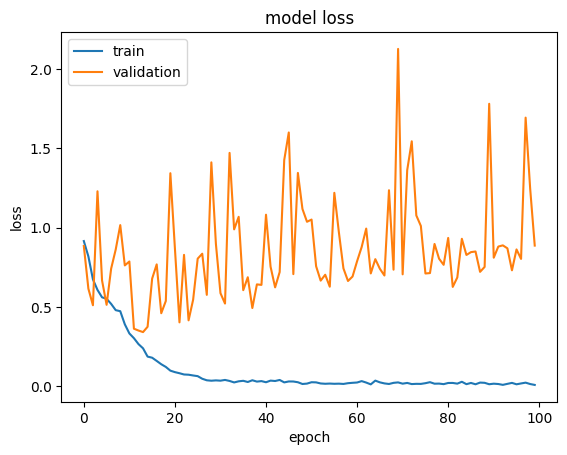

In [78]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

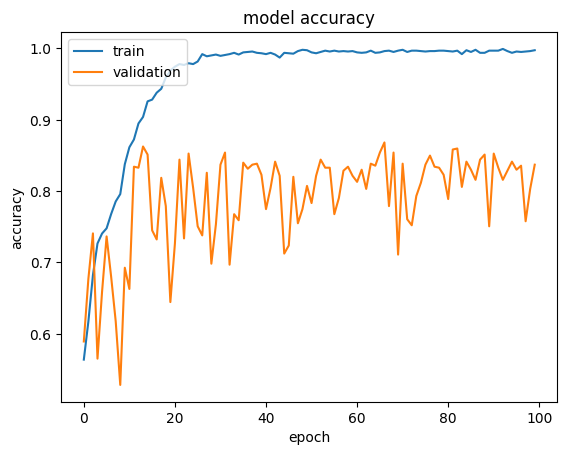

In [80]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy']) # Changed 'acc' to 'accuracy'
plt.plot(model_history.history['val_accuracy']) # Changed 'val_acc' to 'val_accuracy'
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()